<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:300%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(100, 61, 207);
            background-color:skyblue;
            overflow:hidden;
            font-weight:400"><b>Healthcare Cardiovascular Disease (CVD) Project:</b>
</div>

![](https://cdnl.iconscout.com/lottie/premium/thumb/doctor-checking-up-patient-5139513-4295179.gif)

<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(100, 61, 207);
            background-color:skyblue;
            overflow:hidden;
            font-weight:400"><b>Description:</b>
</div>

Medical Examination Dataset Summary
  This dataset includes health records of individuals, capturing key attributes for analyzing cardiovascular disease (CVD) risk and other health conditions.

<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(100, 61, 207);
            background-color:skyblue;
            overflow:hidden;
            font-weight:400"><b>Key Features:</b>
</div>


<div style="color: White; display: fill;
            border-radius: 5px;
            background-color: skyblue;
            border-color:rgb(100, 61, 207);
            font-size: 50%;
            font-family: Verdana">

<p style="padding: 7px; color: Black;">
      <ul>   <H3>📌<b>ID:</b> - Unique identifier for each patient</H3>
      <H3> <b>1- Demographics:</b> <H3>
         📌 <B>Age:</B> - Age of the patient (in Days).<br>
         📌 <b>Gender:</b> - Gender of the patient (1: Female, 2: Male).<br>
<p style="padding: 7px; color: Black;">
      <H3><b> 2- Anthropometric Data:</b> <H3>
         📌 <b>Height:</b> - Height of the patient (cm).<br>
         📌 <b>weight:</b> - Weight of the patient (kg).<br>
         📌 <b>BMI:</b> - BMI of the patient (calculated).<br>
<p style="padding: 7px; color: Black;">
      <H3> <b>3- Blood Pressure:</b> <H3>
          📌 <b>ap_hi:</b> - Systolic of the patient (ap_hi).<br>
          📌 <b>ap_lo:</b> - Diastolic of the patient (ap_lo).<br>
<p style="padding: 7px; color: Black;">
      <H3><b> 4- Health Indicators:</b> <H3>
          📌 <b>cholesterol:</b> - Cholesterol of the patient (1: Low, 2: Medium, 3: High).<br>
          📌 <b>gluc:</b> - glucose of the patient (1: Low, 2: Medium, 3: High).<br>
          📌 <b>smoke:</b> - smoking of the patient (0: Non-smoker, 1: Smoker).<br>
          📌 <b>alco:</b> - alcohol of the patient (0: Non-alcoholic, 1: Alcoholic).<br>
          📌 <b>active:</b> - physical activity of the patient (0: Non-active, 1: Active).<br>
<p style="padding: 7px; color: Black;">
     <H3> <b>5- Target Variable:</b> <H3>
          📌 <b>Cardio:</b> - Cardiovascular disease of the patient (1: Present, 0: Absent).<br>
<br>
    <p style = "padding: 3px; color: Black;">

<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(100, 61, 207);
            background-color:skyblue;
            overflow:hidden;
            font-weight:400"><b>Dataset Overview:</b>
</div>

*1*- Size: (13*70000) Thousands of individual records.

2- Type: Mixed numeric and categorical data.

3- Challenges: Includes outliers and categorical data requiring cleaning and preprocessing.

<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(100, 61, 207);
            background-color:skyblue;
            overflow:hidden;
            font-weight:400"><b>Importing Libraries:</b>
</div>

In [ ]:
pip install dash

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
import dash
from dash import html, dcc
from plotly.subplots import make_subplots
from scipy.stats import gaussian_kde
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency

<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(100, 61, 207);
            background-color:skyblue;
            overflow:hidden;
            font-weight:400"><b>Read CSV file (RAW Data)</b>
</div>

In [ ]:
Healthcare=pd.read_csv('medical_examination.csv')
Healthcare.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [ ]:
Healthcare.tail()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0

<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(100, 61, 207);
            background-color:skyblue;
            overflow:hidden;
            font-weight:400"><b>Get more information about the dataset:</b>
</div>

In [ ]:
Healthcare.info()
print("Shape of Healthcare dataset---> ",Healthcare.shape)
print("Check Duplication in the dataset--->", Healthcare.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
Shape of Healthcare dataset--->  (70000, 13)
Check Duplication in the dataset---> 0


<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(100, 61, 207);
            background-color:skyblue;
            overflow:hidden;
            font-weight:400"><b>Dataset Statistics</b>
</div>

In [ ]:
Healthcare.describe()

id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349843    164.359229     74.205690   
std    28851.302323   2467.251667      0.477253      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      3.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250      0.572270      0.283484   
min     -150.000000    -70.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      2.000000      1.000000      0.000000   
max    16020.000000  11000.000000      3.000000      3.000000      1.000000   

               alco        active        cardio  
count  70000.000000  70000.000000  70000.000000  
mean       0.053771      0.803729      0.499700  
std        0.225568      0.397179      0.500003  
min        0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000  
50%        0.000000      1.000000      0.000000  
75%        0.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000

<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(100, 61, 207);
            background-color:skyblue;
            overflow:hidden;
            font-weight:400"><b>Converting Human age from days to years</b>
</div>



In [ ]:
Healthcare_Cleaned=Healthcare.copy()
Healthcare_Cleaned['age']=Healthcare_Cleaned['age']/365
Healthcare_Cleaned['age']=Healthcare_Cleaned['age'].astype('int64')
Healthcare_Cleaned

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0   50       2     168    62.0    110     80            1     1   
1          1   55       1     156    85.0    140     90            3     1   
2          2   51       1     165    64.0    130     70            3     1   
3          3   48       2     169    82.0    150    100            1     1   
4          4   47       1     156    56.0    100     60            1     1   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993   52       2     168    76.0    120     80            1     1   
69996  99995   61       1     158   126.0    140     90            2     2   
69997  99996   52       2     183   105.0    180     90            3     1   
69998  99998   61       1     163    72.0    135     80            1     2   
69999  99999   56       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1          0     0       1       1  
2          0     0       0       1  
3          0     0       1       1  
4          0     0       0       0  
...      ...   ...     ...     ...  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0  

[70000 rows x 13 columns]

In [ ]:
Healthcare_Cleaned.describe()

id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900     52.840671      1.349843    164.359229     74.205690   
std    28851.302323      6.766774      0.477253      8.210126     14.395757   
min        0.000000     29.000000      1.000000     55.000000     10.000000   
25%    25006.750000     48.000000      1.000000    159.000000     65.000000   
50%    50001.500000     53.000000      1.000000    165.000000     72.000000   
75%    74889.250000     58.000000      2.000000    170.000000     82.000000   
max    99999.000000     64.000000      3.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250      0.572270      0.283484   
min     -150.000000    -70.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      2.000000      1.000000      0.000000   
max    16020.000000  11000.000000      3.000000      3.000000      1.000000   

               alco        active        cardio  
count  70000.000000  70000.000000  70000.000000  
mean       0.053771      0.803729      0.499700  
std        0.225568      0.397179      0.500003  
min        0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000  
50%        0.000000      1.000000      0.000000  
75%        0.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000

In [ ]:

colors = ["blue", "lightcoral", "lightgreen","yellow", "#7B68EE","blue", "lightcoral", "lightgreen","yellow", "#7B68EE","blue"]

columns = ['age','gender', 'height', 'weight', 'ap_hi', 'ap_lo','cholesterol','gluc','smoke','alco','active']

fig = make_subplots(rows=4, cols=3, subplot_titles=[f'Distribution of {col}' for col in columns])

# Loop through columns and plot histograms with different colors
for i, column in enumerate(columns):
    row = (i // 3) + 1
    col = (i % 3) + 1
    fig.add_trace(
        go.Histogram(
            x=Healthcare_Cleaned[column],
            nbinsx=30,
            marker=dict(
                color=colors[i],  # Fill color
                line=dict(color='black', width=2)  # Edge color and width
            ),
            name=column
        ),
        row=row, col=col
    )
    fig.update_xaxes(title_text=column, row=row, col=col)
    fig.update_yaxes(title_text="Count", row=row, col=col)



fig.update_layout(showlegend=False,
    title_text="Feature Distributions",
    title_font_size=20,
    width=1200,  # Increase figure width
    height=1000,  # Increase figure height
    margin=dict(t=50, b=50, l=50, r=50) ) # Adjust margins


fig.update_layout(title_text="Feature Distributions", title_font_size=16)


fig.show()

# **There is unlogical values in gender 1 for Females and 2 for Males But 3 for What?**
##Drop gender = 3

In [ ]:
distinct_values = Healthcare_Cleaned['gender'].value_counts()
print(distinct_values)

Healthcare_Cleaned=Healthcare_Cleaned[Healthcare_Cleaned['gender']!=3]
distinct_values_AfterHandling = Healthcare_Cleaned['gender'].value_counts()
print(distinct_values_AfterHandling)

gender
1    45522
2    24467
3       11
Name: count, dtype: int64
gender
1    45522
2    24467
Name: count, dtype: int64


<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(100, 61, 207);
            background-color:skyblue;
            overflow:hidden;
            font-weight:400"><b>From the above histogram: Age distribution is a left skewed and needs normalization</b>
</div>



In [ ]:
'''

corr_matrix = Healthcare_Cleaned.drop(columns=["id"]).corr()


fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale="RdYlBu",
    zmin=-1,
    zmax=1,
    text=np.round(corr_matrix.values, 2),
    hoverinfo="text" )
)


annotations = []
for i, row in enumerate(corr_matrix.values):
    for j, value in enumerate(row):
        annotations.append(
            dict(
                x=corr_matrix.columns[j],
                y=corr_matrix.columns[i],
                text=str(round(value, 2)),
                showarrow=False,
                font=dict(color="black")
            )
        )


fig.update_layout(
    title="Feature Correlation Heatmap",
    title_font_size=20,
    xaxis=dict(title="Features", tickangle=-45),
    yaxis=dict(title="Features"),
    width=800,
    height=600,
    annotations=annotations  # Add annotations to the heatmap
)


fig.show()
'''

'\n\ncorr_matrix = Healthcare_Cleaned.drop(columns=["id"]).corr()\n\n\nfig = go.Figure(data=go.Heatmap(\n    z=corr_matrix.values,\n    x=corr_matrix.columns,\n    y=corr_matrix.columns,\n    colorscale="RdYlBu",\n    zmin=-1,\n    zmax=1,\n    text=np.round(corr_matrix.values, 2),\n    hoverinfo="text" )\n)\n\n\nannotations = []\nfor i, row in enumerate(corr_matrix.values):\n    for j, value in enumerate(row):\n        annotations.append(\n            dict(\n                x=corr_matrix.columns[j],\n                y=corr_matrix.columns[i],\n                text=str(round(value, 2)),\n                showarrow=False,\n                font=dict(color="black")\n            )\n        )\n\n\nfig.update_layout(\n    title="Feature Correlation Heatmap",\n    title_font_size=20,\n    xaxis=dict(title="Features", tickangle=-45),\n    yaxis=dict(title="Features"),\n    width=800,\n    height=600,\n    annotations=annotations  # Add annotations to the heatmap\n)\n\n\nfig.show()\n'

In [ ]:

# Assuming Healthcare_Cleaned is your DataFrame
# Healthcare_Cleaned = pd.read_csv('your_data.csv')  # Example of loading data

# Define unique colors for each box plot
colors = ["blue", "lightcoral", "lightgreen","yellow", "#7B68EE"]

# List of columns to plot
columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Create subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=[f'Box Plot of {col}' for col in columns])

# Loop through columns and plot box plots
for i, column in enumerate(columns):
    row = (i // 2) + 1  # Calculate row position
    col = (i % 2) + 1   # Calculate column position
    fig.add_trace(
        go.Box(
            y=Healthcare_Cleaned[column],
            name=column,
            marker_color=colors[i]  # Set box color
        ),
        row=row, col=col
    )

# Hide unused subplots if they exist
for j in range(len(columns), 6):  # 6 subplots in a 3x2 grid
    fig.update_traces(visible=False, row=(j // 2) + 1, col=(j % 2) + 1)

# Update layout
fig.update_layout(
    title="Box Plots of Features",
    title_font_size=20,
    showlegend=False,
    height=800,
    width=1000
)

# Show the final figure
fig.show()

<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(100, 61, 207);
            background-color:skyblue;
            overflow:hidden;
            font-weight:400"><b>Cleaning 'height' column the condition used neglect samples which height lower than 100 or greater than 200 (Search from Wikipedia)</b>
</div>



In [ ]:
FilteredHeight= ((Healthcare_Cleaned['height']>200) | (Healthcare_Cleaned['height']<100)).sum()
FilteredHeight

31

In [ ]:
Healthcare_Cleaned = Healthcare_Cleaned.drop(Healthcare_Cleaned[(Healthcare_Cleaned['height'] > 200) | (Healthcare_Cleaned['height'] < 100)].index)


In [ ]:
Healthcare_Cleaned

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0   50       2     168    62.0    110     80            1     1   
1          1   55       1     156    85.0    140     90            3     1   
2          2   51       1     165    64.0    130     70            3     1   
3          3   48       2     169    82.0    150    100            1     1   
4          4   47       1     156    56.0    100     60            1     1   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993   52       2     168    76.0    120     80            1     1   
69996  99995   61       1     158   126.0    140     90            2     2   
69997  99996   52       2     183   105.0    180     90            3     1   
69998  99998   61       1     163    72.0    135     80            1     2   
69999  99999   56       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1          0     0       1       1  
2          0     0       0       1  
3          0     0       1       1  
4          0     0       0       0  
...      ...   ...     ...     ...  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0  

[69958 rows x 13 columns]

<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(100, 61, 207);
            background-color:skyblue;
            overflow:hidden;
            font-weight:400"><b>Cleaning 'weight' Column in dataset by neglecting humans whose weight is greater than 190 or less than 45</b>
</div>



In [ ]:
FilteredWeight= ((Healthcare_Cleaned['weight']>190) | (Healthcare_Cleaned['weight']<45)).sum()
FilteredWeight

304

In [ ]:
Healthcare_Cleaned = Healthcare_Cleaned.drop(Healthcare_Cleaned[(Healthcare_Cleaned['weight'] > 190) | (Healthcare_Cleaned['weight'] < 45)].index)

In [ ]:
Healthcare_Cleaned

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0   50       2     168    62.0    110     80            1     1   
1          1   55       1     156    85.0    140     90            3     1   
2          2   51       1     165    64.0    130     70            3     1   
3          3   48       2     169    82.0    150    100            1     1   
4          4   47       1     156    56.0    100     60            1     1   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993   52       2     168    76.0    120     80            1     1   
69996  99995   61       1     158   126.0    140     90            2     2   
69997  99996   52       2     183   105.0    180     90            3     1   
69998  99998   61       1     163    72.0    135     80            1     2   
69999  99999   56       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1          0     0       1       1  
2          0     0       0       1  
3          0     0       1       1  
4          0     0       0       0  
...      ...   ...     ...     ...  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0  

[69654 rows x 13 columns]

In [ ]:

Healthcare_Cleaned.describe()

id           age        gender        height        weight  \
count  69654.000000  69654.000000  69654.000000  69654.000000  69654.000000   
mean   49958.038849     52.845321      1.350805    164.445502     74.344762   
std    28854.556667      6.762313      0.477226      7.952530     14.222838   
min        0.000000     29.000000      1.000000    100.000000     45.000000   
25%    24989.250000     48.000000      1.000000    159.000000     65.000000   
50%    49987.500000     53.000000      1.000000    165.000000     72.000000   
75%    74880.750000     58.000000      2.000000    170.000000     82.000000   
max    99999.000000     64.000000      2.000000    200.000000    183.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  69654.000000  69654.000000  69654.000000  69654.000000  69654.000000   
mean     128.865133     96.698940      1.367373      1.226864      0.088365   
std      154.334330    188.831336      0.680704      0.572724      0.283828   
min     -150.000000    -70.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      2.000000      1.000000      0.000000   
max    16020.000000  11000.000000      3.000000      3.000000      1.000000   

               alco        active        cardio  
count  69654.000000  69654.000000  69654.000000  
mean       0.053881      0.803515      0.500747  
std        0.225784      0.397343      0.500003  
min        0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000  
50%        0.000000      1.000000      1.000000  
75%        0.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000

<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(100, 61, 207);
            background-color:skyblue;
            overflow:hidden;
            font-weight:400"><b>Identify the lowest possible value of ap_hi from the below table we found that its value equals to 50 mmHg</b>
</div>



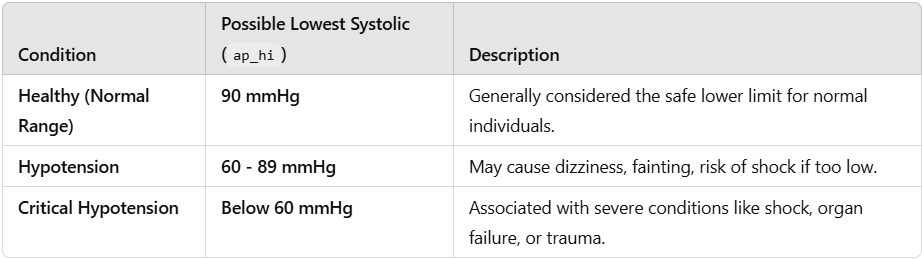

<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(100, 61, 207);
            background-color:skyblue;
            overflow:hidden;
            font-weight:400"><b>Identify the highest possible vaue of ap_hi from the below table we will take the upper threshold -->250 mmHg</b>
</div>



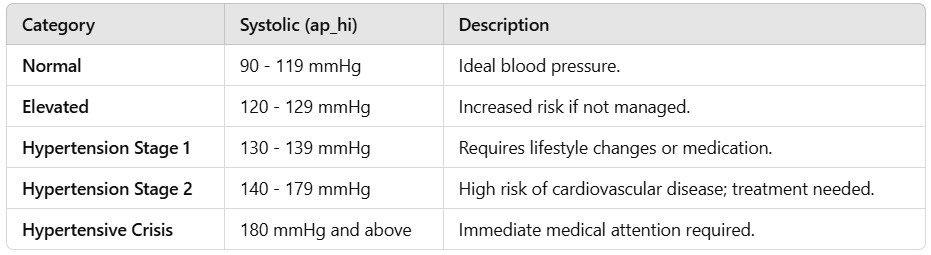

<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(100, 61, 207);
            background-color:skyblue;
            overflow:hidden;
            font-weight:400"><b>These thresholds are chosen based on search taking into consideration (Age[29,64],Weight[45,183], height[100,200])</b>
</div>



In [ ]:

Filtered_ap_hi= ((Healthcare_Cleaned['ap_hi']>250) | (Healthcare_Cleaned['ap_hi']<50)).sum()
Filtered_ap_hi

224

In [ ]:
Healthcare_Cleaned = Healthcare_Cleaned.drop(Healthcare_Cleaned[(Healthcare_Cleaned['ap_hi'] > 250) | (Healthcare_Cleaned['ap_hi'] < 50)].index)

In [ ]:
Healthcare_Cleaned

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0   50       2     168    62.0    110     80            1     1   
1          1   55       1     156    85.0    140     90            3     1   
2          2   51       1     165    64.0    130     70            3     1   
3          3   48       2     169    82.0    150    100            1     1   
4          4   47       1     156    56.0    100     60            1     1   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993   52       2     168    76.0    120     80            1     1   
69996  99995   61       1     158   126.0    140     90            2     2   
69997  99996   52       2     183   105.0    180     90            3     1   
69998  99998   61       1     163    72.0    135     80            1     2   
69999  99999   56       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1          0     0       1       1  
2          0     0       0       1  
3          0     0       1       1  
4          0     0       0       0  
...      ...   ...     ...     ...  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0  

[69430 rows x 13 columns]

<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(100, 61, 207);
            background-color:skyblue;
            overflow:hidden;
            font-weight:400"><b>Identify the upper and lower thresholds of ap_lo. Let's take the upper threshold--> 150 mm Hg and the lowr threshold-->40 mm Hg</b>
</div>



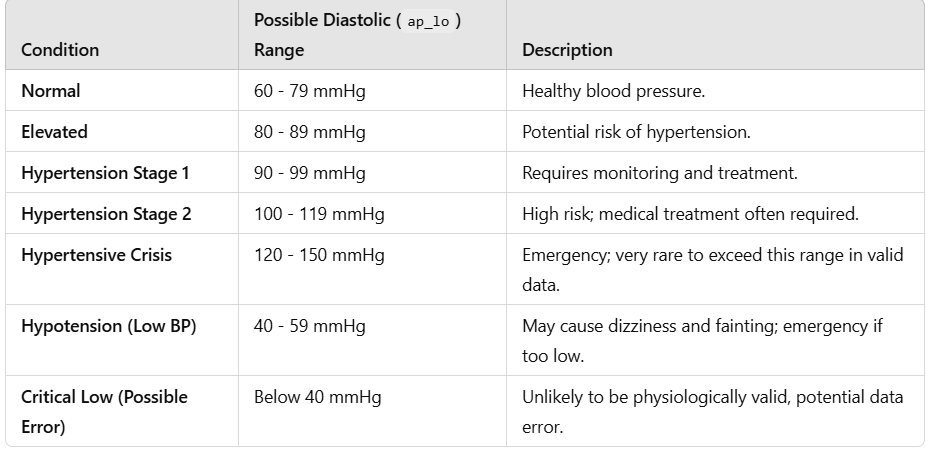

In [ ]:
Filtered_ap_lo= ((Healthcare_Cleaned['ap_lo']>150) | (Healthcare_Cleaned['ap_lo']<40)).sum()
Filtered_ap_lo

1013

In [ ]:
(Healthcare_Cleaned[((Healthcare_Cleaned['ap_lo']>150) | (Healthcare_Cleaned['ap_lo']<40)) & (Healthcare_Cleaned['cardio']==1)])

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
228      314   47       2     183    98.0    160   1100            1     2   
241      334   60       2     157    60.0    160   1000            2     1   
260      357   49       1     150    83.0    140    800            1     1   
329      458   64       1     176    63.0    160   1000            2     2   
345      482   51       1     154    81.0    140   1000            2     1   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
69631  99454   40       1     154    90.0    130   1000            2     2   
69771  99659   63       1     167    81.0    160   1000            1     1   
69872  99798   59       1     152    56.0    160   1000            1     1   
69878  99807   58       2     168    95.0    160   1000            1     1   
69967  99955   58       2     168    63.0    140   1000            1     1   

       smoke  alco  active  cardio  
228        1     0       1       1  
241        0     0       0       1  
260        0     0       1       1  
329        0     0       0       1  
345        0     0       1       1  
...      ...   ...     ...     ...  
69631      0     0       1       1  
69771      0     0       1       1  
69872      0     0       1       1  
69878      0     0       1       1  
69967      0     0       1       1  

[837 rows x 13 columns]

<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(100, 61, 207);
            background-color:skyblue;
            overflow:hidden;
            font-weight:400"><b> The number of samples in which ap_lo>150 & ap_lo<40 & cardio=1 is 837 samples. </b>
</div>



#Used Criteria
We assumed that people whose ap_lo>150 and ap_lo<40 should be patients so cardio flag='1' But we wanted to impute ap_lo with logic values so we have determined mean and median of dataframe with conditions
(Healthcare_Cleaned['ap_lo']<150) & (Healthcare_Cleaned['ap_lo']>40) & (Healthcare_Cleaned['cardio']==1) this is the normal case.

In [ ]:
#Filter Healthcare_Cleaned with condition cardio==1:
Healthcare_Cleaned_Cardio1=Healthcare_Cleaned[(Healthcare_Cleaned['ap_lo']<150) & (Healthcare_Cleaned['ap_lo']>40) & (Healthcare_Cleaned['cardio']==1)]
Healthcare_Cleaned_Cardio1.describe()


id           age        gender        height        weight  \
count  33908.000000  33908.000000  33908.000000  33908.000000  33908.000000   
mean   50081.886222     54.462133      1.352955    164.323906     76.795529   
std    28824.229845      6.354043      0.477896      8.057985     14.746116   
min        1.000000     39.000000      1.000000    100.000000     45.000000   
25%    25261.250000     50.000000      1.000000    159.000000     66.000000   
50%    50135.500000     55.000000      1.000000    165.000000     75.000000   
75%    74996.500000     60.000000      2.000000    170.000000     85.000000   
max    99998.000000     64.000000      2.000000    198.000000    183.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  33908.000000  33908.000000  33908.000000  33908.000000  33908.000000   
mean     133.828595     84.619441      1.516722      1.278076      0.083520   
std       17.343563      9.630103      0.776675      0.625285      0.276671   
min       70.000000     45.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      130.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      2.000000      1.000000      0.000000   
max      240.000000    140.000000      3.000000      3.000000      1.000000   

               alco        active   cardio  
count  33908.000000  33908.000000  33908.0  
mean       0.051699      0.788192      1.0  
std        0.221421      0.408596      0.0  
min        0.000000      0.000000      1.0  
25%        0.000000      1.000000      1.0  
50%        0.000000      1.000000      1.0  
75%        0.000000      1.000000      1.0  
max        1.000000      1.000000      1.0

In [ ]:


# Assuming Healthcare_Cleaned_Cardio1 is your DataFrame
# Healthcare_Cleaned_Cardio1 = pd.read_csv('your_data.csv')  # Example of loading data

# Calculate mean and median
mean_value = Healthcare_Cleaned_Cardio1['ap_lo'].mean()
median_value = Healthcare_Cleaned_Cardio1['ap_lo'].median()

# Create histogram with KDE
fig = go.Figure()

# Add histogram
fig.add_trace(
    go.Histogram(
        x=Healthcare_Cleaned_Cardio1['ap_lo'],
        nbinsx=30,  # Number of bins
        marker_color='skyblue',  # Histogram color
        name='Histogram',
        opacity=0.75,
        histnorm='probability density'  # Normalize for density
    )
)

# Compute KDE
kde = gaussian_kde(Healthcare_Cleaned_Cardio1['ap_lo'].dropna())
x_range = np.linspace(Healthcare_Cleaned_Cardio1['ap_lo'].min(), Healthcare_Cleaned_Cardio1['ap_lo'].max(), 1000)
y_kde = kde(x_range)

# Add KDE as a line plot
fig.add_trace(
    go.Scatter(
        x=x_range,
        y=y_kde,
        mode='lines',
        line=dict(color='orange', width=2),
        name='KDE'
    )
)

# Add mean line
fig.add_trace(
    go.Scatter(
        x=[mean_value, mean_value],
        y=[0, max(y_kde)],  # Adjust y-range to match KDE height
        mode='lines',
        line=dict(color='red', dash='dash'),
        name='Mean'
    )
)

# Add median line
fig.add_trace(
    go.Scatter(
        x=[median_value, median_value],
        y=[0, max(y_kde)],  # Adjust y-range to match KDE height
        mode='lines',
        line=dict(color='green', dash='dash'),
        name='Median'
    )
)

# Update layout
fig.update_layout(
    title='Distribution of ap_lo',
    title_font_size=20,
    xaxis_title='ap_lo',
    yaxis_title='Density',
    legend_title='Legend',
    showlegend=True,
    template='plotly_white'
)

# Show the figure
fig.show()

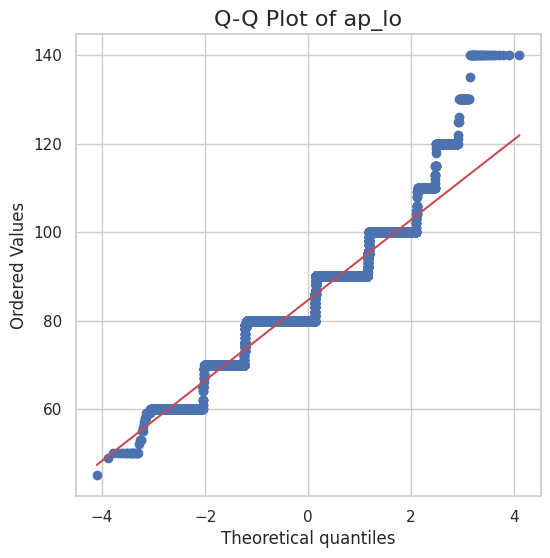

In [ ]:
 #Q-Q plot to check for normality
plt.figure(figsize=(6, 6))
stats.probplot(Healthcare_Cleaned_Cardio1['ap_lo'].dropna(), dist="norm", plot=plt)
plt.title(f'Q-Q Plot of {column}', fontsize=16)
plt.show()

In [ ]:
#Get the values of mean and median:
print("Mean vaue of ap_lo: ",Healthcare_Cleaned_Cardio1['ap_lo'].mean())
print("Median vaue of ap_lo: ",Healthcare_Cleaned_Cardio1['ap_lo'].median())

Mean vaue of ap_lo:  84.61944083991979
Median vaue of ap_lo:  80.0


<div style="padding:10px;
            color:white;
            margin:10px;
            font-size:200%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color:rgb(100, 61, 207);
            background-color:skyblue;
            overflow:hidden;
            font-weight:400"><b>Samples in Healthcare_Cleaned which ap_lo>150 & ap_hi<40 & cardio=1 impute the value of ap_lo with the mean value.</b>
</div>



In [ ]:
mean_ap_lo = int(Healthcare_Cleaned_Cardio1['ap_lo'].mean())

# Apply the imputation based on the specified conditions
Healthcare_Cleaned.loc[((Healthcare_Cleaned['ap_lo'] > 150) | (Healthcare_Cleaned['ap_lo'] < 40)) & (Healthcare_Cleaned['cardio'] == 1),'ap_lo'] = mean_ap_lo


In [ ]:
Healthcare_Cleaned

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0   50       2     168    62.0    110     80            1     1   
1          1   55       1     156    85.0    140     90            3     1   
2          2   51       1     165    64.0    130     70            3     1   
3          3   48       2     169    82.0    150    100            1     1   
4          4   47       1     156    56.0    100     60            1     1   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993   52       2     168    76.0    120     80            1     1   
69996  99995   61       1     158   126.0    140     90            2     2   
69997  99996   52       2     183   105.0    180     90            3     1   
69998  99998   61       1     163    72.0    135     80            1     2   
69999  99999   56       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1          0     0       1       1  
2          0     0       0       1  
3          0     0       1       1  
4          0     0       0       0  
...      ...   ...     ...     ...  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0  

[69430 rows x 13 columns]

In [ ]:
# Verify the changes in the DataFrame
print(Healthcare_Cleaned[((Healthcare_Cleaned['ap_lo'] > 150) | (Healthcare_Cleaned['ap_hi'] < 40))& (Healthcare_Cleaned['cardio'] == 1)])

Empty DataFrame
Columns: [id, age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio]
Index: []


In [ ]:
#(Healthcare_Cleaned[((Healthcare_Cleaned['ap_lo']>150) | (Healthcare_Cleaned['ap_lo']<40)) & (Healthcare_Cleaned['cardio']==1)])
Healthcare_Cleaned[((Healthcare_Cleaned['ap_lo'] > 150) | (Healthcare_Cleaned['ap_lo'] < 40)) & (Healthcare_Cleaned['cardio'] == 0)].count()

id             176
age            176
gender         176
height         176
weight         176
ap_hi          176
ap_lo          176
cholesterol    176
gluc           176
smoke          176
alco           176
active         176
cardio         176
dtype: int64

In [ ]:
condition=(((Healthcare_Cleaned['ap_lo'] > 150) | (Healthcare_Cleaned['ap_lo'] < 40)) & (Healthcare_Cleaned['cardio'] == 0))
Healthcare_Cleaned=Healthcare_Cleaned[~condition]
Healthcare_Cleaned

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0   50       2     168    62.0    110     80            1     1   
1          1   55       1     156    85.0    140     90            3     1   
2          2   51       1     165    64.0    130     70            3     1   
3          3   48       2     169    82.0    150    100            1     1   
4          4   47       1     156    56.0    100     60            1     1   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993   52       2     168    76.0    120     80            1     1   
69996  99995   61       1     158   126.0    140     90            2     2   
69997  99996   52       2     183   105.0    180     90            3     1   
69998  99998   61       1     163    72.0    135     80            1     2   
69999  99999   56       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1          0     0       1       1  
2          0     0       0       1  
3          0     0       1       1  
4          0     0       0       0  
...      ...   ...     ...     ...  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0  

[69254 rows x 13 columns]

In [ ]:
Healthcare_Cleaned.describe()

id           age        gender        height        weight  \
count  69254.000000  69254.000000  69254.000000  69254.000000  69254.000000   
mean   49958.128368     52.846565      1.350579    164.440754     74.341584   
std    28855.901668      6.760867      0.477155      7.952150     14.223690   
min        0.000000     29.000000      1.000000    100.000000     45.000000   
25%    24983.750000     48.000000      1.000000    159.000000     65.000000   
50%    49982.000000     53.000000      1.000000    165.000000     72.000000   
75%    74878.750000     58.000000      2.000000    170.000000     82.000000   
max    99999.000000     64.000000      2.000000    200.000000    183.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  69254.000000  69254.000000  69254.000000  69254.000000  69254.000000   
mean     127.020562     81.418445      1.367589      1.226904      0.088486   
std       17.042365      9.486860      0.681026      0.572832      0.284002   
min       60.000000     40.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      2.000000      1.000000      0.000000   
max      240.000000    150.000000      3.000000      3.000000      1.000000   

               alco        active        cardio  
count  69254.000000  69254.000000  69254.000000  
mean       0.053932      0.803578      0.501935  
std        0.225885      0.397294      0.500000  
min        0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000  
50%        0.000000      1.000000      1.000000  
75%        0.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000

# **Export Cleaned Dataset.**

In [ ]:
Healthcare_Cleaned.to_csv('Healthcare_Cleaned_Updated.csv', index=False, encoding='utf-8')
print("Updated DataFrame saved to 'Healthcare_Cleaned_Updated.csv'.")

Updated DataFrame saved to 'Healthcare_Cleaned_Updated.csv'.


# **Boxplots of [age,height,weight,ap_hi,ap_lo] after cleaning**

In [ ]:
colors = ["blue", "lightcoral", "lightgreen","yellow", "#7B68EE"]
columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Create subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=[f'Box Plot of {col}' for col in columns])


for i, column in enumerate(columns):
    row = (i // 2) + 1
    col = (i % 2) + 1
    fig.add_trace(
        go.Box(
            y=Healthcare_Cleaned[column],
            name=column,
            marker_color=colors[i]  # Set box color
        ),
        row=row, col=col
    )

for j in range(len(columns), 6):  # 6 subplots in a 3x2 grid
    fig.update_traces(visible=False, row=(j // 2) + 1, col=(j % 2) + 1)

# Update layout
fig.update_layout(
    title="Box Plots of Features",
    title_font_size=20,
    showlegend=False,
    height=800,
    width=1000
)

# Show the final figure
fig.show()

In [ ]:
Healthcare_Cleaned

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0   50       2     168    62.0    110     80            1     1   
1          1   55       1     156    85.0    140     90            3     1   
2          2   51       1     165    64.0    130     70            3     1   
3          3   48       2     169    82.0    150    100            1     1   
4          4   47       1     156    56.0    100     60            1     1   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993   52       2     168    76.0    120     80            1     1   
69996  99995   61       1     158   126.0    140     90            2     2   
69997  99996   52       2     183   105.0    180     90            3     1   
69998  99998   61       1     163    72.0    135     80            1     2   
69999  99999   56       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1          0     0       1       1  
2          0     0       0       1  
3          0     0       1       1  
4          0     0       0       0  
...      ...   ...     ...     ...  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0  

[69254 rows x 13 columns]

# **EDA (Exploratory Data Analysis):**

## **Step 4: Feature Engineering**

Feature engineering involves creating new columns for analysis:

##**BMI Calculation:**
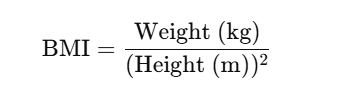

**Convert height from centimeters to meters before calculation.**

#**BMI Categories: Classify BMI values into categories:**
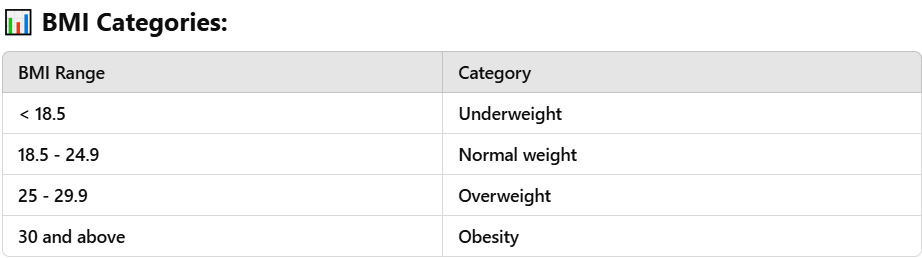

#**In our data: Mapping of each category:**
1--> Under weight.

2--> Normal weight.

3--> Overweight.

4--> Obesity.

#**Hypertension Indicator: Add a flag indicating hypertension based on blood pressure thresholds.**

###**Thresholds taken based on the above tables, These thresholds are classified as hypertension stage1:**

ap_hi-->130 mmHg

ap_lo-->90 mmHg

Based on this thresholds Hypertension=1

In [ ]:
# Calculate BMI
#Healthcare_Cleaned = Healthcare_Cleaned.copy()
Healthcare_Cleaned.loc[:,'height_m'] = Healthcare_Cleaned['height'] / 100  # Convert height to meters
Healthcare_Cleaned.loc[:,'bmi'] = Healthcare_Cleaned['weight'] / (Healthcare_Cleaned['height_m'] ** 2)  # Calculate BMI
Healthcare_Cleaned.drop(columns=['height_m'], inplace=True)  # Remove temporary column

# Add BMI Category
def bmi_category(bmi):
    if bmi < 18.5:
        return 1
    elif bmi < 24.9:
        return 2
    elif bmi < 29.9:
        return 3
    else:
        return 4

Healthcare_Cleaned.loc[:,'bmi_category'] = Healthcare_Cleaned['bmi'].apply(bmi_category)

# Add Hypertension Indicator
Healthcare_Cleaned.loc[:,'hypertension'] = ((Healthcare_Cleaned['ap_hi'] > 130) | (Healthcare_Cleaned['ap_lo'] > 90)).astype(int)

Healthcare_Cleaned.head()

<ipython-input-169-743d93b97035>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-169-743d93b97035>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0   50       2     168    62.0    110     80            1     1      0   
1   1   55       1     156    85.0    140     90            3     1      0   
2   2   51       1     165    64.0    130     70            3     1      0   
3   3   48       2     169    82.0    150    100            1     1      0   
4   4   47       1     156    56.0    100     60            1     1      0   

   alco  active        bmi  bmi_category  hypertension         MAP  PP  cardio  
0     0       1  21.967120             2             0   90.000000  30       0  
1     0       1  34.927679             4             1  106.666667  50       1  
2     0       0  23.507805             2             0   90.000000  60       1  
3     0       1  28.710479             3             1  116.666667  50       1  
4     0       0  23.011177             2             0   73.333333  40       0

#**Both Pulse Pressure (PP) and Mean Arterial Pressure (MAP) are Features are related to cardiovascular**

In [ ]:
# Calculate Mean Arterial Pressure (MAP)
Healthcare_Cleaned.loc[:,'MAP'] = (Healthcare_Cleaned['ap_hi'] + 2 * Healthcare_Cleaned['ap_lo']) / 3

# Calculate Pulse Pressure (PP)
Healthcare_Cleaned.loc[:,'PP'] = Healthcare_Cleaned['ap_hi'] - Healthcare_Cleaned['ap_lo']
# Remove 'cardio' column and store it temporarily
cardio_col = Healthcare_Cleaned.pop('cardio')

# Insert it back at the last position
Healthcare_Cleaned['cardio'] = cardio_col

# Display results
Healthcare_Cleaned

<ipython-input-170-246d86432a4f>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0   50       2     168    62.0    110     80            1     1   
1          1   55       1     156    85.0    140     90            3     1   
2          2   51       1     165    64.0    130     70            3     1   
3          3   48       2     169    82.0    150    100            1     1   
4          4   47       1     156    56.0    100     60            1     1   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993   52       2     168    76.0    120     80            1     1   
69996  99995   61       1     158   126.0    140     90            2     2   
69997  99996   52       2     183   105.0    180     90            3     1   
69998  99998   61       1     163    72.0    135     80            1     2   
69999  99999   56       1     170    72.0    120     80            2     1   

       smoke  alco  active        bmi  bmi_category  hypertension         MAP  \
0          0     0       1  21.967120             2             0   90.000000   
1          0     0       1  34.927679             4             1  106.666667   
2          0     0       0  23.507805             2             0   90.000000   
3          0     0       1  28.710479             3             1  116.666667   
4          0     0       0  23.011177             2             0   73.333333   
...      ...   ...     ...        ...           ...           ...         ...   
69995      1     0       1  26.927438             3             0   93.333333   
69996      0     0       1  50.472681             4             1  106.666667   
69997      0     1       0  31.353579             4             1  120.000000   
69998      0     0       0  27.099251             3             1   98.333333   
69999      0     0       1  24.913495             3             0   93.333333   

       PP  cardio  
0      30       0  
1      50       1  
2      60       1  
3      50       1  
4      40       0  
...    ..     ...  
69995  40       0  
69996  50       1  
69997  90       1  
69998  55       1  
69999  40       0  

[69254 rows x 18 columns]

# **Getting the correlation between categorical features and Cardio target column**

##**Based on search found that:**
**to know the relationship between the feature and target column it depends on the type of the data of the column.**

--> if both feature column and target column are numerical we can use pearson correlation.

--> if both feature column and target column are categorical we can use chi2_contingency correlation (p<0.05 indicates to significant feature).

--> if feature column is numerical and traget column is categorical we can use ANOVA , Biserial or Kruskal-Wallis correlation.

From the above notes:
--> chi2_contingency is used to judge the relation between ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi_category','hypertension'] & target column 'cardio'.

--> ANOVA or Biserial correlation is used to judge the relation between ['height', 'weight', 'ap_hi', 'ap_lo', 'bmi', 'MAP', 'PP'] & The target column.




In [ ]:
# Define categorical columns
categorical_columns = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco',
                       'active', 'bmi_category', 'hypertension']

# Calculate chi-square p-values and store them in a list
chi2_results = []
for col in categorical_columns:
    contingency_table = pd.crosstab(Healthcare_Cleaned[col], Healthcare_Cleaned['cardio'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results.append({'Feature': col, 'p-value': p})

# Convert the results to a DataFrame
chi2_df = pd.DataFrame(chi2_results)

# Sort the DataFrame by p-value in ascending order
chi2_df = chi2_df.sort_values(by='p-value', ascending=True).reset_index(drop=True)

# Display the sorted DataFrame
print(chi2_df)


        Feature        p-value
0   cholesterol   0.000000e+00
1  bmi_category   0.000000e+00
2  hypertension   0.000000e+00
3          gluc  2.812682e-128
4        active   5.176176e-21
5         smoke   4.062548e-05
6          alco   5.417612e-02
7        gender   5.799174e-02


From the above analysis:
it is found that:
All Categorical features [Cholestrol,bmi_categoty,hypertension,glucose,active,smoke,alcohol,gender] are significant features ascendingly for the target column 'Cardio'.

# **For Numerical Features we have used Point Biserial:**
#**Numerical Features are: ['age','height','weight','ap_hi','ap_lo','BMI','MAP','PP'] and Traget column is 'cardio'**

  Feature  Correlation (r_pb)   P-value
1  height           -0.015468  0.000047
2  weight            0.180700  0.000000
5     bmi            0.187492  0.000000
0     age            0.238207  0.000000
7      PP            0.332809  0.000000
4   ap_lo            0.337317  0.000000
6     MAP            0.415229  0.000000
3   ap_hi            0.431994  0.000000


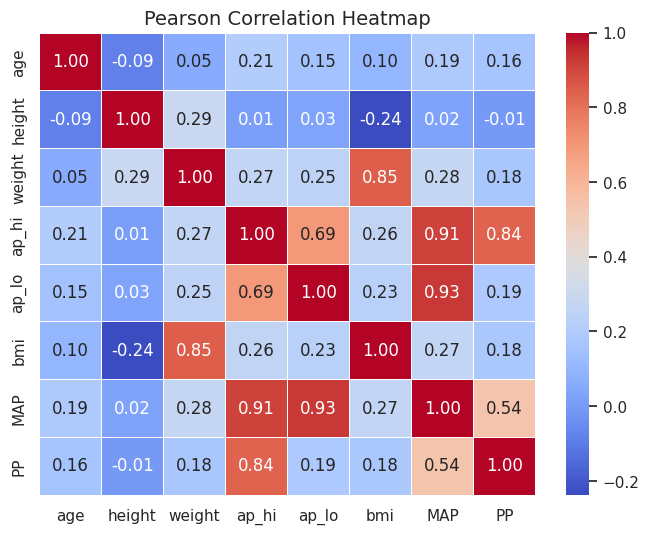

In [ ]:
# Calculate Point-Biserial Correlation
NumericalColumns=['age','height','weight','ap_hi','ap_lo','bmi','MAP','PP']
# Initialize an empty list to store results
correlation_results = []
for columnfeature in NumericalColumns:
  r_pb, p_value = pointbiserialr(Healthcare_Cleaned['cardio'], Healthcare_Cleaned[columnfeature])
  correlation_results.append({'Feature': columnfeature, 'Correlation (r_pb)': r_pb, 'P-value': p_value})

# Convert list to DataFrame
correlation_df = pd.DataFrame(correlation_results)
correlation_df=correlation_df.sort_values(by='Correlation (r_pb)',ascending=True)

# Display results
print(correlation_df)

# Compute Pearson correlation matrix
pearson_corr = Healthcare_Cleaned[NumericalColumns].corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Title
plt.title("Pearson Correlation Heatmap", fontsize=14)

# Show plot
plt.show()

From the above observations:
* We found that the most significant features are ap_hi, MAP,ap_lo,PP
* But ap_lo & PP their values are similar. the same for MAP & ap_hi
so we wanted to check if they are independent features or redundant.
* By using heat map to check the correlation as they are numerical.

# **Check the balance of the data**

---



In [ ]:
'''
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns to balance (including 'cardio' as the target)
categorical_columns = ['gender', 'cholesterol', 'gluc', 'smoke',
                       'alco', 'active', 'bmi_category', 'hypertension', 'cardio']

# Set the plot style
sns.set(style='whitegrid')

# Drop rows with NaNs in any of the categorical columns
Healthcare_Balanced = Healthcare_Cleaned.dropna(subset=categorical_columns).copy()

# Create a combined label of all categorical features including 'cardio'
Healthcare_Balanced['combined'] = Healthcare_Balanced[categorical_columns].astype(str).agg('-'.join, axis=1)

# Apply RandomOverSampler to balance the entire dataset based on the combined label
ros = SMOTE()
X_resampled, y_resampled = ros.fit_resample(
    Healthcare_Balanced.drop(columns=['combined', 'cardio']),
    Healthcare_Balanced['combined']
)

# Reconstruct the balanced DataFrame
balanced_data = pd.DataFrame(X_resampled, columns=Healthcare_Balanced.drop(columns=['combined', 'cardio']).columns)

# Decompose the combined label back into original categorical columns, including 'cardio'
balanced_data[categorical_columns] = y_resampled.str.split('-', expand=True)
balanced_data[categorical_columns] = balanced_data[categorical_columns].apply(pd.to_numeric, errors='ignore')

# Plot the original and balanced distributions for each feature (excluding 'cardio' itself)
for col in categorical_columns[:-1]:  # Exclude 'cardio' from the loop
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Original data plot
    sns.countplot(x=Healthcare_Balanced[col], hue=Healthcare_Balanced['cardio'],
                  palette='Blues', ax=axes[0])
    axes[0].set_title(f'Original Data Distribution for {col}', fontsize=16)
    axes[0].set_xlabel(col, fontsize=14)
    axes[0].set_ylabel('Count', fontsize=14)

    # Display counts on top of the bars for original data
    for p in axes[0].patches:
        axes[0].annotate(f'{int(p.get_height())}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='baseline', fontsize=10, color='black',
                         xytext=(0, 5), textcoords='offset points')

    # Balanced data plot with independent scale
    sns.countplot(x=balanced_data[col], hue=balanced_data['cardio'],
                  palette='viridis', ax=axes[1])
    axes[1].set_title(f'Balanced Data Distribution for {col}', fontsize=16)
    axes[1].set_xlabel(col, fontsize=14)
    axes[1].set_ylabel('Count', fontsize=14)

    # Display counts on top of the bars for balanced data
    for p in axes[1].patches:
        axes[1].annotate(f'{int(p.get_height())}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='baseline', fontsize=10, color='black',
                         xytext=(0, 5), textcoords='offset points')

    plt.tight_layout()
    plt.show()
'''

"\nfrom imblearn.over_sampling import SMOTE\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# List of categorical columns to balance (including 'cardio' as the target)\ncategorical_columns = ['gender', 'cholesterol', 'gluc', 'smoke',\n                       'alco', 'active', 'bmi_category', 'hypertension', 'cardio']\n\n# Set the plot style\nsns.set(style='whitegrid')\n\n# Drop rows with NaNs in any of the categorical columns\nHealthcare_Balanced = Healthcare_Cleaned.dropna(subset=categorical_columns).copy()\n\n# Create a combined label of all categorical features including 'cardio'\nHealthcare_Balanced['combined'] = Healthcare_Balanced[categorical_columns].astype(str).agg('-'.join, axis=1)\n\n# Apply RandomOverSampler to balance the entire dataset based on the combined label\nros = SMOTE()\nX_resampled, y_resampled = ros.fit_resample(\n    Healthcare_Balanced.drop(columns=['combined', 'cardio']),\n    Healthcare_Balanced['combined']\n)\n\n# Reconstruct t

In [ ]:
'''
import matplotlib.pyplot as plt
import pandas as pd

def plot_categorical_balance(original_data, balanced_data, categorical_features):
    plt.figure(figsize=(16, 12))
    plt.suptitle('Balance Percentage of Categorical Features in Original vs. Balanced Data', fontsize=18)

    # Define the grid size based on the number of categorical features
    num_features = len(categorical_features)
    rows = (num_features // 3) + (1 if num_features % 3 != 0 else 0)

    for i, feature in enumerate(categorical_features):
        plt.subplot(rows, 3, i + 1)

        # Calculate percentage distribution for categorical features
        original_counts = original_data[feature].value_counts(normalize=True) * 100
        balanced_counts = balanced_data[feature].value_counts(normalize=True) * 100

        balance_df = pd.DataFrame({
            'Category': original_counts.index.astype(str),
            'Original': original_counts.values,
            'Balanced': balanced_counts.reindex(original_counts.index, fill_value=0).values
        })

        ax = balance_df.set_index('Category')[['Original', 'Balanced']].plot(
            kind='bar', ax=plt.gca(), color=['#1f77b4', '#ff7f0e']
        )

        plt.title(f'Categorical: {feature}')
        plt.xlabel('Category')
        plt.ylabel('Percentage (%)')
        plt.xticks(rotation=45)
        plt.legend(loc='best')

        # Add percentage labels on the bars
        for container in ax.containers:
            ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Define categorical features only
categorical_features = ['gender', 'cholesterol', 'gluc', 'smoke',
                        'alco', 'active', 'bmi_category', 'hypertension']

# Call the function with original and balanced datasets
plot_categorical_balance(Healthcare_Cleaned, balanced_data, categorical_features)
'''

"\nimport matplotlib.pyplot as plt\nimport pandas as pd\n\ndef plot_categorical_balance(original_data, balanced_data, categorical_features):\n    plt.figure(figsize=(16, 12))\n    plt.suptitle('Balance Percentage of Categorical Features in Original vs. Balanced Data', fontsize=18)\n\n    # Define the grid size based on the number of categorical features\n    num_features = len(categorical_features)\n    rows = (num_features // 3) + (1 if num_features % 3 != 0 else 0)\n\n    for i, feature in enumerate(categorical_features):\n        plt.subplot(rows, 3, i + 1)\n\n        # Calculate percentage distribution for categorical features\n        original_counts = original_data[feature].value_counts(normalize=True) * 100\n        balanced_counts = balanced_data[feature].value_counts(normalize=True) * 100\n\n        balance_df = pd.DataFrame({\n            'Category': original_counts.index.astype(str),\n            'Original': original_counts.values,\n            'Balanced': balanced_counts.re

In [ ]:
'''
balanced_data
'''

'\nbalanced_data\n'

In [ ]:
from sklearn.feature_selection import mutual_info_classif

X = Healthcare_Cleaned[['gender',	'height',	'weight',	'ap_hi',	'ap_lo',	'cholesterol',	'gluc',	'smoke',	'alco',	'active',	'bmi',	'bmi_category',	'hypertension']]
y = Healthcare_Cleaned['cardio']

mi_scores = mutual_info_classif(X, y,random_state=15)
# Create a DataFrame with feature names and their respective MI scores
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})

# Sort the DataFrame by MI Score in descending order for better visualization
mi_df = mi_df.sort_values(by='MI Score', ascending=False).reset_index(drop=True)

# Print the DataFrame
print(mi_df)

         Feature  MI Score
0          ap_hi  0.119932
1   hypertension  0.099472
2          ap_lo  0.080895
3    cholesterol  0.025059
4   bmi_category  0.021530
5            bmi  0.020021
6         weight  0.016275
7           gluc  0.011681
8         active  0.008378
9         gender  0.006755
10        height  0.002239
11         smoke  0.002148
12          alco  0.001799


In [ ]:
'''
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import gc

# Define features and target from balanced_data
X = balanced_data[['gender', 'height', 'weight', 'ap_hi', 'ap_lo',
                   'cholesterol', 'gluc', 'smoke', 'alco', 'active',
                   'bmi', 'bmi_category', 'hypertension']].copy()
y = balanced_data['cardio'].copy()

# Downcast numerical columns and convert categorical columns
for col in ['height', 'weight', 'ap_hi', 'ap_lo', 'bmi']:
    X[col] = pd.to_numeric(X[col], downcast='float')

categorical_cols = ['gender', 'cholesterol', 'gluc', 'smoke',
                    'alco', 'active', 'bmi_category', 'hypertension']
X[categorical_cols] = X[categorical_cols].astype('category')

# Calculate mutual information with parallel processing and chunking
mi_scores = []
chunk_size = 100000

for start in range(0, len(X), chunk_size):
    end = min(start + chunk_size, len(X))
    mi_scores_chunk = mutual_info_classif(
        X.iloc[start:end], y.iloc[start:end], random_state=15, n_jobs=-1
    )
    mi_scores.extend(mi_scores_chunk)

# Create a DataFrame with feature names and their respective MI scores
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores[:len(X.columns)]})

# Sort the DataFrame by MI Score in descending order
mi_df = mi_df.sort_values(by='MI Score', ascending=False).reset_index(drop=True)

# Clean up memory
del X, y
gc.collect()

print(mi_df)
'''

"\nfrom sklearn.feature_selection import mutual_info_classif\nimport pandas as pd\nimport gc\n\n# Define features and target from balanced_data\nX = balanced_data[['gender', 'height', 'weight', 'ap_hi', 'ap_lo',\n                   'cholesterol', 'gluc', 'smoke', 'alco', 'active',\n                   'bmi', 'bmi_category', 'hypertension']].copy()\ny = balanced_data['cardio'].copy()\n\n# Downcast numerical columns and convert categorical columns\nfor col in ['height', 'weight', 'ap_hi', 'ap_lo', 'bmi']:\n    X[col] = pd.to_numeric(X[col], downcast='float')\n\ncategorical_cols = ['gender', 'cholesterol', 'gluc', 'smoke',\n                    'alco', 'active', 'bmi_category', 'hypertension']\nX[categorical_cols] = X[categorical_cols].astype('category')\n\n# Calculate mutual information with parallel processing and chunking\nmi_scores = []\nchunk_size = 100000\n\nfor start in range(0, len(X), chunk_size):\n    end = min(start + chunk_size, len(X))\n    mi_scores_chunk = mutual_info_classif

In [ ]:
'''
from scipy.stats import chi2_contingency
# Define categorical columns
categorical_columns = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco',
                       'active', 'bmi_category', 'hypertension']

# Calculate chi-square p-values and store them in a list
chi2_results = []
for col in categorical_columns:
    contingency_table = pd.crosstab(balanced_data[col], balanced_data['cardio'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results.append({'Feature': col, 'p-value': p})

# Convert the results to a DataFrame
chi2_df = pd.DataFrame(chi2_results)

# Sort the DataFrame by p-value in ascending order
chi2_df = chi2_df.sort_values(by='p-value', ascending=True).reset_index(drop=True)

# Display the sorted DataFrame
print(chi2_df)
'''

"\nfrom scipy.stats import chi2_contingency\n# Define categorical columns\ncategorical_columns = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco',\n                       'active', 'bmi_category', 'hypertension']\n\n# Calculate chi-square p-values and store them in a list\nchi2_results = []\nfor col in categorical_columns:\n    contingency_table = pd.crosstab(balanced_data[col], balanced_data['cardio'])\n    chi2, p, _, _ = chi2_contingency(contingency_table)\n    chi2_results.append({'Feature': col, 'p-value': p})\n\n# Convert the results to a DataFrame\nchi2_df = pd.DataFrame(chi2_results)\n\n# Sort the DataFrame by p-value in ascending order\nchi2_df = chi2_df.sort_values(by='p-value', ascending=True).reset_index(drop=True)\n\n# Display the sorted DataFrame\nprint(chi2_df)\n"

In [ ]:
'''
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns (excluding 'cardio' as the target)
categorical_columns = ['gender', 'cholesterol', 'gluc', 'smoke',
                       'alco', 'active', 'bmi_category', 'hypertension']

# Set the plot style
sns.set(style='whitegrid')

# Drop rows with NaNs in any of the categorical columns and 'cardio'
Healthcare_Balanced = Healthcare_Cleaned.dropna(subset=categorical_columns + ['cardio']).copy()

# Separate features and target
X = Healthcare_Balanced.drop(columns=['cardio'])
y = Healthcare_Balanced['cardio']

# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Combine balanced data into a DataFrame for easier visualization
Balanced_Data = pd.concat([pd.DataFrame(X_balanced, columns=X.columns),
                           pd.DataFrame(y_balanced, columns=['cardio'])], axis=1)

# Visualization of the balanced 'cardio' classes
plt.figure(figsize=(6, 4))
sns.countplot(data=Balanced_Data, x='cardio', palette='viridis')
plt.title('Balanced Cardio Classes using SMOTE')
plt.xlabel('Cardio')
plt.ylabel('Count')
plt.show()
'''

"\nfrom imblearn.over_sampling import SMOTE\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# List of categorical columns (excluding 'cardio' as the target)\ncategorical_columns = ['gender', 'cholesterol', 'gluc', 'smoke',\n                       'alco', 'active', 'bmi_category', 'hypertension']\n\n# Set the plot style\nsns.set(style='whitegrid')\n\n# Drop rows with NaNs in any of the categorical columns and 'cardio'\nHealthcare_Balanced = Healthcare_Cleaned.dropna(subset=categorical_columns + ['cardio']).copy()\n\n# Separate features and target\nX = Healthcare_Balanced.drop(columns=['cardio'])\ny = Healthcare_Balanced['cardio']\n\n# Apply SMOTE to balance the data\nsmote = SMOTE(random_state=42)\nX_balanced, y_balanced = smote.fit_resample(X, y)\n\n# Combine balanced data into a DataFrame for easier visualization\nBalanced_Data = pd.concat([pd.DataFrame(X_balanced, columns=X.columns),\n                           pd.DataFrame(y_balanced, columns=['cardio

In [ ]:
'''
from scipy.stats import chi2_contingency
# Define categorical columns
categorical_columns = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco',
                       'active', 'bmi_category', 'hypertension']

# Calculate chi-square p-values and store them in a list
chi2_results = []
for col in categorical_columns:
    contingency_table = pd.crosstab(Balanced_Data[col], Balanced_Data['cardio'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results.append({'Feature': col, 'p-value': p})

# Convert the results to a DataFrame
chi2_df = pd.DataFrame(chi2_results)

# Sort the DataFrame by p-value in ascending order
chi2_df = chi2_df.sort_values(by='p-value', ascending=True).reset_index(drop=True)

# Display the sorted DataFrame
print(chi2_df)
'''

"\nfrom scipy.stats import chi2_contingency\n# Define categorical columns\ncategorical_columns = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco',\n                       'active', 'bmi_category', 'hypertension']\n\n# Calculate chi-square p-values and store them in a list\nchi2_results = []\nfor col in categorical_columns:\n    contingency_table = pd.crosstab(Balanced_Data[col], Balanced_Data['cardio'])\n    chi2, p, _, _ = chi2_contingency(contingency_table)\n    chi2_results.append({'Feature': col, 'p-value': p})\n\n# Convert the results to a DataFrame\nchi2_df = pd.DataFrame(chi2_results)\n\n# Sort the DataFrame by p-value in ascending order\nchi2_df = chi2_df.sort_values(by='p-value', ascending=True).reset_index(drop=True)\n\n# Display the sorted DataFrame\nprint(chi2_df)\n"

In [ ]:
'''
import matplotlib.pyplot as plt
import pandas as pd

def plot_categorical_balance(original_data, balanced_data, categorical_features):
    plt.figure(figsize=(16, 12))
    plt.suptitle('Balance Percentage of Categorical Features in Original vs. Balanced Data', fontsize=18)

    # Define the grid size based on the number of categorical features
    num_features = len(categorical_features)
    rows = (num_features // 3) + (1 if num_features % 3 != 0 else 0)

    for i, feature in enumerate(categorical_features):
        plt.subplot(rows, 3, i + 1)

        # Calculate percentage distribution for categorical features
        original_counts = original_data[feature].value_counts(normalize=True) * 100
        balanced_counts = balanced_data[feature].value_counts(normalize=True) * 100

        balance_df = pd.DataFrame({
            'Category': original_counts.index.astype(str),
            'Original': original_counts.values,
            'Balanced': balanced_counts.reindex(original_counts.index, fill_value=0).values
        })

        ax = balance_df.set_index('Category')[['Original', 'Balanced']].plot(
            kind='bar', ax=plt.gca(), color=['#1f77b4', '#ff7f0e']
        )

        plt.title(f'Categorical: {feature}')
        plt.xlabel('Category')
        plt.ylabel('Percentage (%)')
        plt.xticks(rotation=45)
        plt.legend(loc='best')

        # Add percentage labels on the bars
        for container in ax.containers:
            ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Define categorical features only
categorical_features = ['gender', 'cholesterol', 'gluc', 'smoke',
                        'alco', 'active', 'bmi_category', 'hypertension']

# Call the function with original and balanced datasets
plot_categorical_balance(Healthcare_Cleaned, Balanced_Data, categorical_features)
'''

"\nimport matplotlib.pyplot as plt\nimport pandas as pd\n\ndef plot_categorical_balance(original_data, balanced_data, categorical_features):\n    plt.figure(figsize=(16, 12))\n    plt.suptitle('Balance Percentage of Categorical Features in Original vs. Balanced Data', fontsize=18)\n\n    # Define the grid size based on the number of categorical features\n    num_features = len(categorical_features)\n    rows = (num_features // 3) + (1 if num_features % 3 != 0 else 0)\n\n    for i, feature in enumerate(categorical_features):\n        plt.subplot(rows, 3, i + 1)\n\n        # Calculate percentage distribution for categorical features\n        original_counts = original_data[feature].value_counts(normalize=True) * 100\n        balanced_counts = balanced_data[feature].value_counts(normalize=True) * 100\n\n        balance_df = pd.DataFrame({\n            'Category': original_counts.index.astype(str),\n            'Original': original_counts.values,\n            'Balanced': balanced_counts.re

<ipython-input-193-6117ec7e143d>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




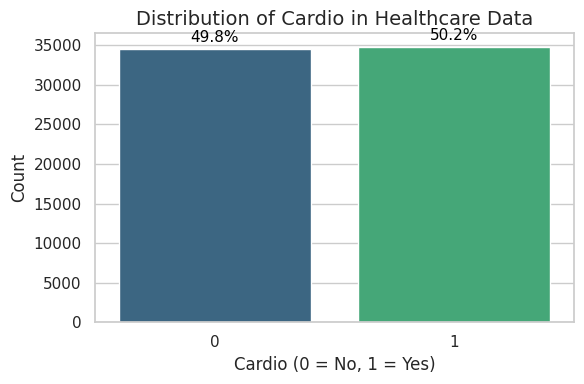

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style='whitegrid')

# Plot the distribution of the 'cardio' column
plt.figure(figsize=(6, 4))
sns.countplot(data=Healthcare_Cleaned, x='cardio', palette='viridis')

# Add percentage labels on the bars
total = len(Healthcare_Cleaned)
for p in plt.gca().patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    plt.gca().annotate(percentage,
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='baseline', fontsize=11, color='black',
                       xytext=(0, 5), textcoords='offset points')

# Set labels and title
plt.xlabel('Cardio (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Cardio in Healthcare Data', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


# **Insights & Check the logic with real life:**
--> The most effective features on the target column **'Cardio'** are **'cholestrol', 'active' , 'bmi_category' & 'hypertension'**.

--> **Cholesterol:**

**Medical Insight:**

* High cholesterol, particularly LDL (bad cholesterol), is a major risk factor for cardiovascular diseases (CVD). It can lead to atherosclerosis, where plaque builds up in arteries, increasing the risk of heart attack and stroke.

* Supporting Studies:
Numerous studies link hypercholesterolemia with increased CVD risk, and cholesterol management is a cornerstone of heart health guidelines.

--> **Active (Physical Activity):**

**Medical Insight:**

* Physical inactivity contributes to obesity, high blood pressure, and poor lipid profiles, all of which are risk factors for CVD. Regular exercise improves heart health, helps control weight, and improves blood pressure and cholesterol levels.

* Supporting Studies:
The American Heart Association (AHA) recommends at least 150 minutes of moderate exercise per week to reduce heart disease risk.

--> **BMI Category:**

**Medical Insight:**

* High BMI, especially in the overweight and obesity categories, is strongly associated with cardiovascular risk factors like:

  * Hypertension
  * Type 2 Diabetes
  * Dyslipidemia

Obesity leads to increased cardiac workload and can promote atherosclerosis.

* Supporting Studies:
Obesity is part of metabolic syndrome, which significantly increases the risk of heart disease.

--> **Hypertension:**

**Medical Insight:**

* Hypertension (high blood pressure) is a leading cause of cardiovascular diseases. It damages blood vessels over time, contributing to:

  * Heart failure

  * Coronary artery disease

  * Stroke

* Supporting Studies:

Managing blood pressure is critical for CVD prevention, as highlighted in guidelines from bodies like the European Society of Cardiology (ESC).

Step 5: Exploratory Data Analysis (EDA)
Visualizations:
BMI Distribution: Display the distribution of BMI using a histogram with a KDE (kernel density estimate).
Correlation Matrix: Visualize correlations between numeric variables using a heatmap.
BMI by Gender: Compare BMI distributions across genders using a boxplot.
Insights:
Understand the spread and central tendency of BMI.
Identify relationships between variables.
Analyze BMI trends across gender categories.
Step 7: Age-Bracket Analysis and Cardiovascular Disease Prevalence
Let's divide the dataset into age brackets to observe trends in cardiovascular disease prevalence.

In [ ]:
# Define age brackets
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
Healthcare_Cleaned['age_bracket'] = pd.cut(Healthcare_Cleaned['age'], bins=bins, labels=labels, right=False)


In [ ]:
Healthcare_Cleaned['age_bracket']

0        50-59
1        50-59
2        50-59
3        40-49
4        40-49
         ...  
69995    50-59
69996    60-69
69997    50-59
69998    60-69
69999    50-59
Name: age_bracket, Length: 69405, dtype: category
Categories (6, object): ['20-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70-79']

Step 8: The output shows the cardiovascular disease (CVD) prevalence across different age brackets. Here’s the interpretation:¶
20-29: 0% prevalence—No individuals in this age range have cardiovascular disease in the dataset.

30-39: 23.85% prevalence—A significant portion of this group has cardiovascular disease.

40-49: 37.43% prevalence—The prevalence continues to rise, showing more individuals with CVD.

50-59: 51.14% prevalence—Over half of this group is affected by CVD. 60-69: 66.73% prevalence

70-79: No data (NaN)—This could indicate missing or incomplete data for this age bracket. A clear majority in this group have cardiovascular disease. This pattern highlights that CVD becomes more prevalent as age increases, suggesting the need for preventive measures starting in middle age.

This pattern highlights that CVD becomes more prevalent as age increases, suggesting the need for preventive measures starting in middle age.

In [ ]:
# Check data types
print(Healthcare_Cleaned[['hypertension', 'age_bracket', 'cardio']].dtypes)

# Count occurrences of cardio per hypertension value
hypertension_counts = Healthcare_Cleaned.groupby(['hypertension', 'cardio']).size().reset_index(name='count')

fig1 = px.bar(
    hypertension_counts,
    x="hypertension",
    y="count",
    color="cardio",
    barmode="group",
    title="Hypertension vs Cardio"
)
fig1.update_xaxes(title_text="Hypertension")
fig1.update_yaxes(title_text="Cardio Count")

# Count occurrences of cardio per age_bracket value
age_bracket_counts = Healthcare_Cleaned.groupby(['age_bracket', 'cardio']).size().reset_index(name='count')

fig2 = px.bar(
    age_bracket_counts,
    x="age_bracket",
    y="count",
    color="cardio",
    barmode="group",
    title="Age Bracket vs Cardio"
)
fig2.update_xaxes(title_text="Age Bracket")
fig2.update_yaxes(title_text="Cardio Count")

# Show both plots
fig1.show()
fig2.show()


hypertension       int64
age_bracket     category
cardio             int64
dtype: object


<ipython-input-46-2d654da4bb6f>:19: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
Healthcare_Cleaned.describe()

id           age        gender        height        weight  \
count  69405.000000  69405.000000  69405.000000  69405.000000  69405.000000   
mean   49959.491406     52.847677      1.350825    164.443527     74.350710   
std    28853.900747      6.761231      0.477232      7.953707     14.227933   
min        0.000000     29.000000      1.000000    100.000000     45.000000   
25%    24986.000000     48.000000      1.000000    159.000000     65.000000   
50%    49985.000000     53.000000      1.000000    165.000000     72.000000   
75%    74885.000000     58.000000      2.000000    170.000000     82.000000   
max    99999.000000     64.000000      2.000000    200.000000    183.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  69405.000000  69405.000000  69405.000000  69405.000000  69405.000000   
mean     127.060702     81.424062      1.367726      1.227044      0.088538   
std       17.068334      9.477297      0.681085      0.572911      0.284078   
min       60.000000     40.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      2.000000      1.000000      0.000000   
max      240.000000    150.000000      3.000000      3.000000      1.000000   

               alco        active        cardio           bmi  bmi_category  \
count  69405.000000  69405.000000  69405.000000  69405.000000  69405.000000   
mean       0.053944      0.803559      0.500843     27.548849      2.901563   
std        0.225909      0.397309      0.500003      5.344579      0.798602   
min        0.000000      0.000000      0.000000     14.527376      1.000000   
25%        0.000000      1.000000      0.000000     23.875115      2.000000   
50%        0.000000      1.000000      1.000000     26.423570      3.000000   
75%        0.000000      1.000000      1.000000     30.297784      4.000000   
max        1.000000      1.000000      1.000000    152.551775      4.000000   

       hypertension  
count  69405.000000  
mean       0.287962  
std        0.452817  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

In [ ]:
Healthcare_Num=Healthcare_Cleaned.drop('age_bracket',axis=1)
correlation = Healthcare_Num.corr()['cardio'].sort_values(ascending=False)
print(correlation)


cardio          1.000000
ap_hi           0.428040
hypertension    0.421552
ap_lo           0.336327
age             0.237510
cholesterol     0.220878
bmi             0.186588
bmi_category    0.183189
weight          0.179610
gluc            0.089216
gender          0.006701
id              0.003970
alco           -0.007418
height         -0.015780
smoke          -0.015792
active         -0.035649
Name: cardio, dtype: float64


In [ ]:
Healthcare_Cleaned

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0   50       2     168    62.0    110     80            1     1   
1          1   55       1     156    85.0    140     90            3     1   
2          2   51       1     165    64.0    130     70            3     1   
3          3   48       2     169    82.0    150    100            1     1   
4          4   47       1     156    56.0    100     60            1     1   
...      ...  ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993   52       2     168    76.0    120     80            1     1   
69996  99995   61       1     158   126.0    140     90            2     2   
69997  99996   52       2     183   105.0    180     90            3     1   
69998  99998   61       1     163    72.0    135     80            1     2   
69999  99999   56       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio        bmi  bmi_category  hypertension  \
0          0     0       1       0  21.967120             2             0   
1          0     0       1       1  34.927679             4             1   
2          0     0       0       1  23.507805             2             0   
3          0     0       1       1  28.710479             3             1   
4          0     0       0       0  23.011177             2             0   
...      ...   ...     ...     ...        ...           ...           ...   
69995      1     0       1       0  26.927438             3             0   
69996      0     0       1       1  50.472681             4             1   
69997      0     1       0       1  31.353579             4             1   
69998      0     0       0       1  27.099251             3             1   
69999      0     0       1       0  24.913495             3             0   

      age_bracket  
0           50-59  
1           50-59  
2           50-59  
3           40-49  
4           40-49  
...           ...  
69995       50-59  
69996       60-69  
69997       50-59  
69998       60-69  
69999       50-59  

[69405 rows x 17 columns]

In [ ]:
Healthcare_Cleaned.head()

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0   50       2     168    62.0    110     80            1     1      0   
1   1   55       1     156    85.0    140     90            3     1      0   
2   2   51       1     165    64.0    130     70            3     1      0   
3   3   48       2     169    82.0    150    100            1     1      0   
4   4   47       1     156    56.0    100     60            1     1      0   

   alco  active  cardio        bmi  bmi_category  hypertension age_bracket  \
0     0       1       0  21.967120             2             0       50-59   
1     0       1       1  34.927679             4             1       50-59   
2     0       0       1  23.507805             2             0       50-59   
3     0       1       1  28.710479             3             1       40-49   
4     0       0       0  23.011177             2             0       40-49   

          MAP  PP  
0   90.000000  30  
1  106.666667  50  
2   90.000000  60  
3  116.666667  50  
4   73.333333  40